# Q Learning

$Q_{s,a} = (1-\alpha).Q_{s,a} + \alpha \left( R_{s,a} + \gamma . max(Q_{s',a'})\right)$

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
import gym
import numpy as np
from gym.envs.registration import register
from gym import wrappers
import shutil

env = gym.make('FrozenLake-v0')

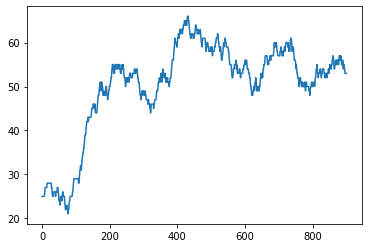

In [19]:
Q= np.zeros((env.observation_space.n, env.action_space.n)) #16x4
alpha=0.1
beta=0.001
gamma=0.95
num_episodes = 1000
reward_list=[]
for i in range(num_episodes):
    s = env.reset();
    done=False
    while done==False:
        if np.random.rand() < beta:
            a = np.random.randint(env.action_space.n)
        else:
            a = np.argmax(Q[s,:] )
        s_next,reward,done,info = env.step(a)
        if done:#reaching goal or falling into a hole
            r = 1.0 if reward > 0.0 else -1.0
        else:#reaching maximum step
            r = 0.0
        Q[s,a]= (1-alpha)*Q[s,a] + alpha*( r + gamma*np.max(Q[s_next,:]) )
        if done == True:
            break
        s=s_next
    reward_list.append(reward)
                                        
plt.plot(np.convolve(np.ones(100),reward_list,"valid"))

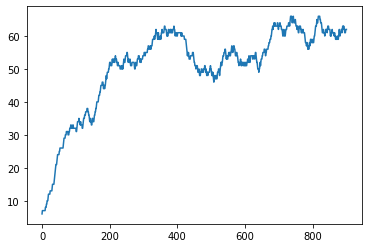

In [15]:
Q= np.zeros((env.observation_space.n, env.action_space.n)) #16x4
alpha=0.1
beta=0.8
gamma=0.95
num_episodes = 1000
reward_list=[]
for i in range(num_episodes):
    s = env.reset();
    done=False
    while done==False:
        if np.random.rand() < beta:
            a = np.random.randint(env.action_space.n)
        else:
            a = np.argmax(Q[s,:] )
        s_next,reward,done,info = env.step(a)
        if done:
            if reward:
                beta=beta*0.8
                r=1.0
            else:
                r=-1.0
        else:
            r=0.0
        Q[s,a]= (1-alpha)*Q[s,a] + alpha*( r + gamma*np.max(Q[s_next,:]) )
        if done == True:
            break
        s=s_next
    reward_list.append(reward)
                                        
plt.plot(np.convolve(np.ones(100),reward_list,"valid"))

In [16]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[-0.06817716 -0.15166568 -0.14231658 -0.17020038]
 [-0.29158607 -0.40367504 -0.26116186  0.01671923]
 [-0.21831293 -0.22163061 -0.22320765 -0.00307426]
 [-0.4288589  -0.30228505 -0.33622868 -0.0168374 ]
 [ 0.03525813 -0.18355026 -0.35247982 -0.21763023]
 [ 0.          0.          0.          0.        ]
 [-0.72468564 -0.70490035 -0.29463867 -0.68596766]
 [ 0.          0.          0.          0.        ]
 [-0.11385153 -0.25837373 -0.23047118  0.07556708]
 [-0.09578105  0.11836862 -0.14529172 -0.15073417]
 [ 0.19250399 -0.24675058 -0.3025523  -0.24551913]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.1        -0.05023731  0.25719064 -0.16155966]
 [ 0.03013089  0.05711709  0.1         0.46273514]
 [ 0.          0.          0.          0.        ]]


In [17]:
s = env.reset()
d=False
n=0
while d==False:
    n+=1
    a = np.argmax(Q[s,:])
    s,r,d,x = env.step(a)
    #print("%s %s %s %s"%(s,r,d,x))
    env.render()
print(n)

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HF

In [6]:
env.close()
#gym.upload('/tmp/FrozenLake_01', api_key='sk_o9OoYpSkKamkW8MrKuHw')